# 一、预备知识点

## 1.样本平均
样本平均是指在给定n个样本之后，求取这n个样本的均值。

给定样本 $\mathbf{x}_1,\mathbf{x}_2,...,\mathbf{x}_n$

注意$\mathbf{x}_j$是多维数据点，假设输入数据有d维，那么

$$\mathbf{x}_j=\begin{bmatrix}
x_{j1}\\
\vdots\\
x_{jd}\\
\end{bmatrix}
$$

sample mean 被定义为：

$$
\bar{\mathbf{x}}=\frac{\mathbf{x}_1+\mathbf{x}_2+...+\mathbf{x}_n}{n}\\
=\frac{\sum_{i=1}^{n} \mathbf{x}_i}{n}
$$

## 2.向量投影 (vector projection)

向量投影是指将某个向量投影到另一个向量的方向上的长度。

<img src='image2.png'>
对于一个向量 $\mathbf{x}$要求其在某个向量$\mathbf{y}$的投影，先取$\mathbf{y}$的单位向量$\mathbf{e}$,$\mathbf{e}^T \mathbf{x}$即为$\mathbf{x}$在该方向上的投影

## 3.矩阵计算

<img src='image3.png'>

下面看几个比较常见的微分如何计算：

1.给定 $\mathbf{e}=[e_1,e_2,...e_n]^T$

$$f(\mathbf{e})=e_1^2+e_2^2+...+e_n^2=\mathbf{e}^T\mathbf{e}$$

那么：

$$
\frac{\partial{\mathbf{e}^T\mathbf{e}}}{\partial{\mathbf{e}}}=\begin{bmatrix}
2e_1\\
\vdots \\
2e_n\\
\end{bmatrix}=2\mathbf{e}
$$

又因为 $\mathbf{e}^T\mathbf{e}=\mathbf{e}\mathbf{e}^T$

所以：

$$
\frac{\partial{\mathbf{e}\mathbf{e}^T}}{\partial{\mathbf{e}}}=\begin{bmatrix}
2e_1\\
\vdots \\
2e_n\\
\end{bmatrix}=2\mathbf{e}
$$



2.对于类似二次型的求导


$$\frac{\partial{\mathbf{e}^T \mathbf{A} \mathbf{e}}}{\mathbf{e}}=(\mathbf{A}+\mathbf{A}^T)\mathbf{e}$$

如果A是对称阵，那么：

$$\frac{\partial{\mathbf{e}^T \mathbf{A} \mathbf{e}}}{\mathbf{e}}=2\mathbf{A}\mathbf{e}$$

# 二、什么是PCA

PCA(Principal conponent analysis)，是指通过将原始数据表示为一个新的正交基上的点来减少数据维度。

<img src='image4.png'>

主成分分析法的首要工作是找到原始数据的若干个主成分，按照重要性的不同依次被称为第一主成分、第二主成分等。

主成分可以被认为是原始数据空间中的一个方向，原始数据可以通过投影到这个方向上来降低维度。因为原数据空间中有无数的方向，能够使得原数据在投影之后分布的原离散越好，因为这样可以增加数据的可分性。能够使得原始数据投影后离散度(方差)最大的方向被称为第一主成分，与第一主成分正交且能使得原始数据投影后离散度最大的方向被称为第二主成分，依次类推。

<img src='image5.png'>


## 1.计算不同投影方向的离散程度

对于任意的投影方向$\mathbf{e}$，我们可以如下来计算器方差：

<img src='image6.png'>

<img src='image7.png'>

其中$\Sigma$被称为协方差，可由原始数据直接计算得到

## 2. 计算主成分

第一主成分可以如下求取：
<img src='image8.png'>

我们使用拉格朗日乘数法:

$$
f(\mathbf{e},\lambda)=\mathbf{e}^T \Sigma \mathbf{e} + \lambda (1-\mathbf{e}^T\mathbf{e})\\
=\mathbf{e}^T \Sigma \mathbf{e} + \lambda - \lambda \mathbf{e}^T\mathbf{e}
$$

对$\mathbf{e}$求导：

$$
\frac{\partial{f}}{\partial{\mathbf{e}}} = 2\Sigma \mathbf{e} - 2\lambda \mathbf{e} =0\\
\\
\Rightarrow\\
\\
\Sigma \mathbf{e}=\lambda \mathbf{e}
$$

可见$\lambda$是$\Sigma$的特征值，$\mathbf{e}$是$\Sigma$的特征向量

同时因为 $\mathbf{e}^T\mathbf{e}=1$

所以：

$$
\mathbf{e}^T\Sigma \mathbf{e}=\lambda \mathbf{e}^T\mathbf{e}=\lambda \\
\\
\Rightarrow\\
\\
\lambda=\mathbf{e}^T\Sigma \mathbf{e}
$$

可见 $\lambda$等于在$\mathbf{e}$方向上的投影后的方差，又因为$\lambda$是$\Sigma$的特征值，所以第一主成分的方向是协方差矩阵最大特征值所对应的特征向量

又因为矩阵的若干个特征向量相互正交，满足主成分的相互正交的特征，所以我们可以总结到:


>对于这样一个特征值问题
> $$\Sigma \mathbf{e}=\lambda \mathbf{e}, \vert \mathbf{e} \vert=1$$
> 第i个主成分向量就是第i大特征值所对应的特征向量
>
> $\lambda_i$:第i个主成分的离散程度
>
> $\mathbf{e}_i$:第i大主成分向量


# 三、用python来计算主成分

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

我们用到的数据集是elements of statistical learning 中的zipcode 数据集，在这本书的[官网](http://statweb.stanford.edu/~tibs/ElemStatLearn/)data分页中可以下载

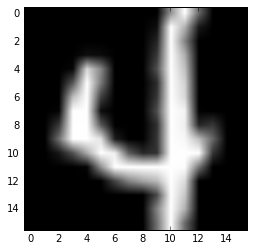

In [5]:
data=np.loadtxt('./zip.train')

#我们用数字4来展示PCA的主成分
digit_4=data[data[:,0]==4]

#这个数据集中每一行的第一列表示的是该行对应的数字，余下列表示的是该输入数据
plt.imshow(digit_4[0,1:].reshape(16,16),cmap='gray')

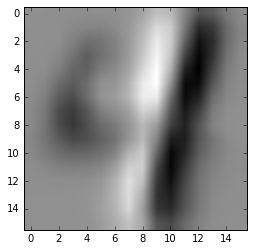

In [7]:
target_4=digit_4[:,0]
data_4=digit_4[:,1:]

#计算协方差矩阵
cov=np.cov(data_4,rowvar=False)

#计算协方差矩阵的特征值和特征向量
evals, evecs = np.linalg.eigh(cov)

#得到特征值排序的索引
idx=np.argsort(evals)

#得到特征值降序排序的索引
idx=idx[::-1]

#将特征向量和特征值按照上述索引进行排列
evecs = evecs[:,idx]

evals = evals[idx]

#绘制第一主成分
plt.imshow(evecs[:,0].reshape(16,16),cmap='gray')
